# 1. ETL (extract, transform, load) Data

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import datasets
from dython.nominal import associations

### 1.1 Data sample

In [2]:
MJE = pd.read_excel(r'C:\Users\hancu\Desktop\Data literacy\P20_MJE_2021_Data.xlsx')
MJE.sample(5)

,CoCode,Region,DocumentNo,Year,Period,G/UMJE,Time,Reference Key,Sess. Name,Type,...,Doc. Date,Revers.Dte,Entry Date,Crcy,Closing week based on entry date,Closing/non-closing week based on entry date,Quarter,Closing week at Q-end,Type2,EUR_Value
52863,TN80,AFR,9390000001,2021,10,GMJE,11:17:16,9390000001TN802021,NaN,XX,...,2021-10-31,NaT,2021-11-03,TND,P10 Wednesday,P10 Wednesday,Q4,NaN,Permanent,19879.50
20312,FI85,WE,7580000311,2021,2,UMJE,16:38:23,7580000311FI852021,NaN,SA,...,2021-03-05,NaT,2021-03-05,EUR,P2 Friday,P2 Friday,Q1,NaN,Permanent,153458.19
50770,RO80,SEE,8380000025,2021,11,UMJE,17:29:47,8380000025RO802021,NaN,UI,...,2021-12-02,NaT,2021-12-02,RON,P11 Thursday,P11 Thursday,Q4,NaN,Permanent,32815.29
17132,FI85,WE,7500000162,2021,1,GMJE,12:43:21,7500000162FI852021,NaN,S2,...,2021-02-05,NaT,2021-02-05,EUR,P1 Friday,P1 Friday,Q1,NaN,Accrual,56640.43
13879,DZ80,AFR,8450000022,2021,3,GMJE,17:19:27,8450000022DZ802021,NaN,UP,...,2021-04-02,NaT,2021-04-02,DZD,P3 Friday,P3 Friday,Q1,Q1 cutoff,Accrual,128135.96


### 1.2 Data Shape & Type

In [3]:
MJE.shape

(56140, 27)

In [4]:
MJE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56140 entries, 0 to 56139
Data columns (total 27 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   CoCode                                        56140 non-null  object        
 1   Region                                        56140 non-null  object        
 2   DocumentNo                                    56140 non-null  int64         
 3   Year                                          56140 non-null  int64         
 4   Period                                        56140 non-null  int64         
 5   G/UMJE                                        56140 non-null  object        
 6   Time                                          56140 non-null  object        
 7   Reference Key                                 56140 non-null  object        
 8   Sess. Name                                    0 non-null      floa

In [5]:
MJE.isnull().sum()

CoCode                                              0
Region                                              0
DocumentNo                                          0
Year                                                0
Period                                              0
G/UMJE                                              0
Time                                                0
Reference Key                                       0
Sess. Name                                      56140
Type                                                0
DT descr                                            0
DT assignment                                       0
MJE scope                                           0
TCode                                               0
Reversal                                        26185
RecEnt doc                                      56140
Pstng Date                                          0
Doc. Date                                           0
Revers.Dte                  

### 1.3 Delete the columns with a big number of blanks: 'Sess. Name', 'Reversal', 'RecEnt doc', 'Revers.Dte', 'Closing week at Q-end'

In [6]:
MJE.drop(['Sess. Name', 'Reversal', 'RecEnt doc', 'Revers.Dte', 'Closing week at Q-end'], axis=1, inplace=True)

In [7]:
MJE.head()

,CoCode,Region,DocumentNo,Year,Period,G/UMJE,Time,Reference Key,Type,DT descr,...,TCode,Pstng Date,Doc. Date,Entry Date,Crcy,Closing week based on entry date,Closing/non-closing week based on entry date,Quarter,Type2,EUR_Value
0,AE80,MEA,6630000017,2021,11,UMJE,12:34:43,6630000017AE802021,PN,GL Account Doc LSAS,...,FB01,2021-11-19,2021-11-19,2021-11-30,AED,P11 Tuesday,P11 Tuesday,Q4,Permanent,203728.69
1,AE80,MEA,7010000000,2021,3,UMJE,14:54:23,7010000000AE802021,QP,OPEX man rev Perm Ac,...,FB01,2021-03-25,2021-03-25,2021-03-25,AED,Non-closing week,P3 Non-closing week,Q1,Permanent,30279.92
2,AE80,MEA,7490000000,2021,3,GMJE,15:40:36,7490000000AE802021,S1,G/L Accr Permanent,...,FB01,2021-04-01,2021-04-01,2021-04-01,EUR,P3 Thursday,P3 Thursday,Q1,Permanent,200000.00
3,AE80,MEA,7490000001,2021,5,GMJE,08:41:14,7490000001AE802021,S1,G/L Accr Permanent,...,FB01,2021-06-03,2021-06-03,2021-06-03,EUR,P5 Thursday,P5 Thursday,Q2,Permanent,200000.00
4,AE80,MEA,7490000002,2021,6,GMJE,14:41:07,7490000002AE802021,S1,G/L Accr Permanent,...,FB01,2021-06-30,2021-06-30,2021-06-30,EUR,P6 Wednesday,P6 Wednesday,Q2,Permanent,200000.00


### 1.4 Split the dataset into 2 datasets:
#### - one with categorical variables
#### - and a second one with numerical variables

In [8]:
categorical = MJE.select_dtypes(include=['object']).columns.tolist()

In [9]:
MJE_categorical = pd.DataFrame(MJE, columns = categorical)
MJE_categorical.sample(5)

,CoCode,Region,G/UMJE,Time,Reference Key,Type,DT descr,DT assignment,MJE scope,TCode,Crcy,Closing week based on entry date,Closing/non-closing week based on entry date,Quarter,Type2
4531,BR11,LAT,UMJE,17:54:04,7500000871BR112021,S2,G/L Accr Auto Revers,R2R - Accounting / Journal Entry,Yes,FBS1,BRL,P12 Thursday,P12 Thursday,Q4,Accrual
38983,ID81,APAC,GMJE,04:10:31,9390000092ID812021,XX,OI/OBL Permanent Adj,O2C- Order Intake,Yes,FB01,IDR,P12 Tuesday,P12 Tuesday,Q4,Permanent
32269,FIDX,WE,GMJE,10:52:55,8450000006FIDX2021,UP,I&R/NSN Interg. Accr,R2R - Revenue Accounting,Yes,FBS1,EUR,P7 Friday,P7 Friday,Q3,Accrual
29157,FI85,WE,GMJE,10:20:49,8450003636FI852021,UP,I&R/NSN Interg. Accr,R2R - Revenue Accounting,Yes,FBS1,EUR,P12 Monday,P12 Monday,Q4,Accrual
49013,PH82,APAC,UMJE,07:18:18,7580000026PH822021,SA,G/L account document,R2R - Accounting / Journal Entry,Yes,FB01,PHP,Non-closing week,P11 Non-closing week,Q4,Permanent


In [10]:
numerical = MJE.select_dtypes(exclude=['object']).columns.tolist()

In [11]:
MJE_numerical = pd.DataFrame(MJE, columns = numerical)
MJE_numerical.head(5)

,DocumentNo,Year,Period,Pstng Date,Doc. Date,Entry Date,EUR_Value
0,6630000017,2021,11,2021-11-19,2021-11-19,2021-11-30,203728.69
1,7010000000,2021,3,2021-03-25,2021-03-25,2021-03-25,30279.92
2,7490000000,2021,3,2021-04-01,2021-04-01,2021-04-01,200000.00
3,7490000001,2021,5,2021-06-03,2021-06-03,2021-06-03,200000.00
4,7490000002,2021,6,2021-06-30,2021-06-30,2021-06-30,200000.00


# 2. Plot Correlation and Associations for the columns

### 2.1 Plot Associations for categorical columns

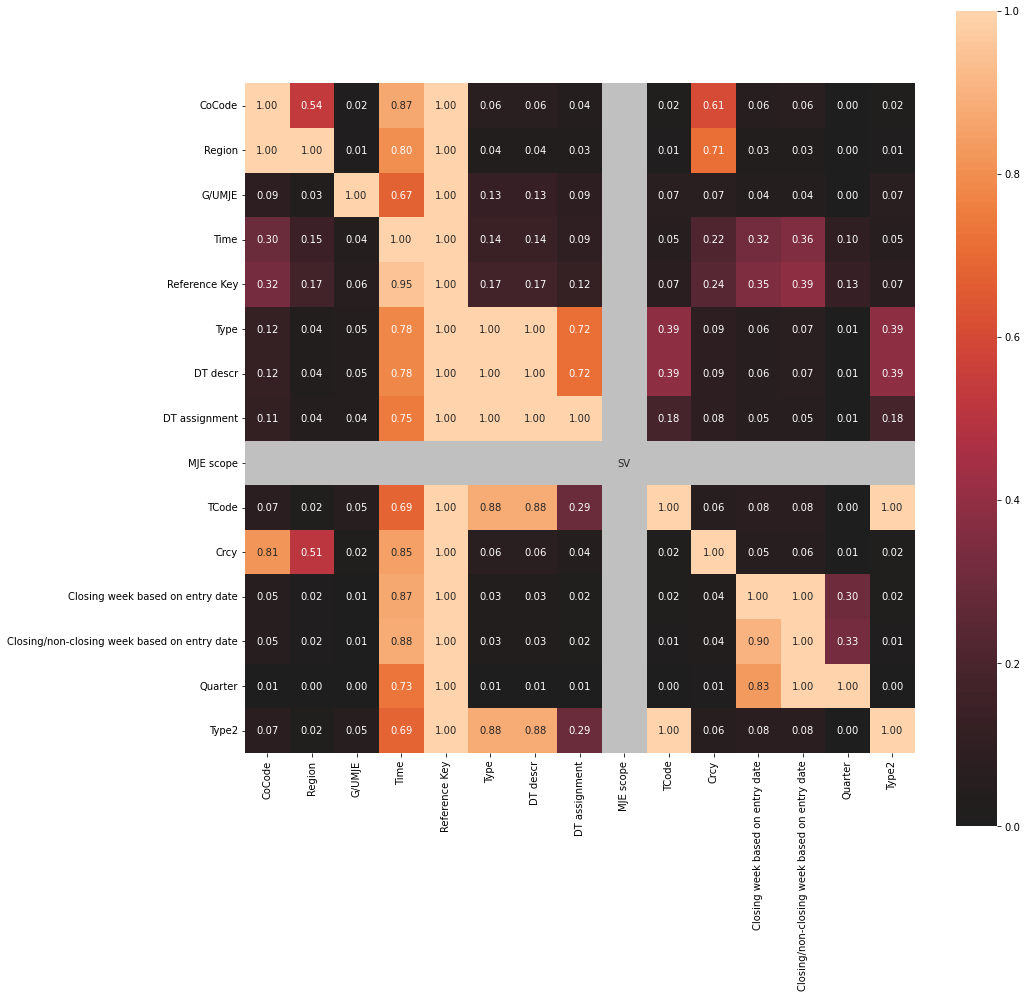

{'corr':                                                 CoCode    Region    G/UMJE  \
 CoCode                                        1.000000  0.535281  0.015394   
 Region                                        1.000000  1.000000  0.009991   
 G/UMJE                                        0.086234  0.029959  1.000000   
 Time                                          0.295657  0.146454  0.040974   
 Reference Key                                 0.323738  0.173291  0.057792   
 Type                                          0.120751  0.036347  0.045761   
 DT descr                                      0.120751  0.036347  0.045761   
 DT assignment                                 0.114564  0.039487  0.043450   
 MJE scope                                     0.000000  0.000000  0.000000   
 TCode                                         0.072049  0.021657  0.054271   
 Crcy                                          0.813857  0.512164  0.016352   
 Closing week based on entry date           

In [12]:
# Calculate the correlation/strength-of-association of features in data-set
# with categorical features using:
# Cramer's V or Theil's U for categorical-categorical cases

associations(MJE_categorical, nom_nom_assoc='theil', figsize=(15, 15), cmap=None, cbar=True)

### 2.2 Plot Correlation for numerical columns

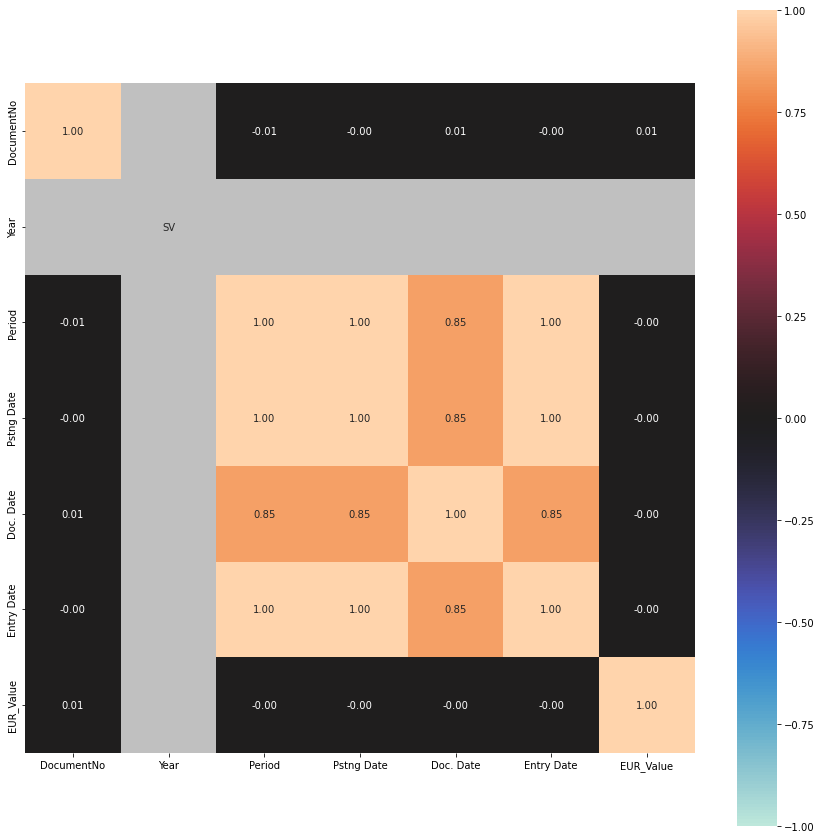

{'corr':             DocumentNo  Year    Period  Pstng Date  Doc. Date  Entry Date  \
 DocumentNo    1.000000   0.0 -0.005612   -0.002185   0.006679   -0.002384   
 Year          0.000000   0.0  0.000000    0.000000   0.000000    0.000000   
 Period       -0.005612   0.0  1.000000    0.998635   0.847960    0.998796   
 Pstng Date   -0.002185   0.0  0.998635    1.000000   0.851160    0.999761   
 Doc. Date     0.006679   0.0  0.847960    0.851160   1.000000    0.851004   
 Entry Date   -0.002384   0.0  0.998796    0.999761   0.851004    1.000000   
 EUR_Value     0.005563   0.0 -0.002054   -0.002017  -0.001354   -0.002029   
 
             EUR_Value  
 DocumentNo   0.005563  
 Year         0.000000  
 Period      -0.002054  
 Pstng Date  -0.002017  
 Doc. Date   -0.001354  
 Entry Date  -0.002029  
 EUR_Value    1.000000  ,
 'ax': <AxesSubplot:>}

In [13]:
# Calculate the correlation/strength-of-association of features in data-set
# with continuous features using:
# Pearson's R for continuous-continuous cases

associations(MJE_numerical, nom_nom_assoc='pearson', figsize=(15, 15), cmap=None, cbar=True)

### Remark:  As per above two heatmaps, some correlations and associations were found between the columns, but at the first sight it’s unlikely that can help us to predict  ‘MJE threshold recommendation’.

# 3. Summary Statistics

### 3.1 Summary Statistics for numerical columns

In [14]:
MJE_numerical.describe().applymap(lambda x: f"{x:0.1f}")

,DocumentNo,Year,Period,EUR_Value
count,56140.0,56140.0,56140.0,56140.0
mean,7982232924.2,2021.0,6.8,2216304.6
std,606605870.3,0.0,3.5,190643110.8
min,6400000015.0,2021.0,1.0,0.0
25%,7500001567.8,2021.0,4.0,32565.3
50%,7580001381.5,2021.0,7.0,126364.8
75%,8450000034.0,2021.0,10.0,491273.0
max,9410000181.0,2021.0,12.0,44999700000.0


In [15]:
print('median of EUR_Value: ' + str(MJE_numerical['EUR_Value'].median()))
print('mod of EUR_Value: ' + str(MJE_numerical['EUR_Value'].mode()))

median of EUR_Value: 126364.75
mod of EUR_Value: 0    10000.0
dtype: float64


### 3.2 Summary Statistics for categorical columns

In [16]:
MJE_categorical.describe(include='all')

,CoCode,Region,G/UMJE,Time,Reference Key,Type,DT descr,DT assignment,MJE scope,TCode,Crcy,Closing week based on entry date,Closing/non-closing week based on entry date,Quarter,Type2
count,56140,56140,56140,56140,56140,56140,56140,56140,56140,56140,56140,56140,56140,56140,56140
unique,148,11,2,37123,56140,20,20,8,1,3,94,85,96,4,3
top,FI85,WE,GMJE,17:07:01,6630000017AE802021,SA,G/L account document,R2R - Accounting / Journal Entry,Yes,FB01,EUR,Non-closing week,P12 Non-closing week,Q4,Permanent
freq,15049,23129,37786,10,1,13520,13520,26734,56140,27200,22554,9688,1666,15393,27200


# 4. Visualize Data

### 4.1 Plot columns in pairs + Boxplots to find-out any Outliers in the data

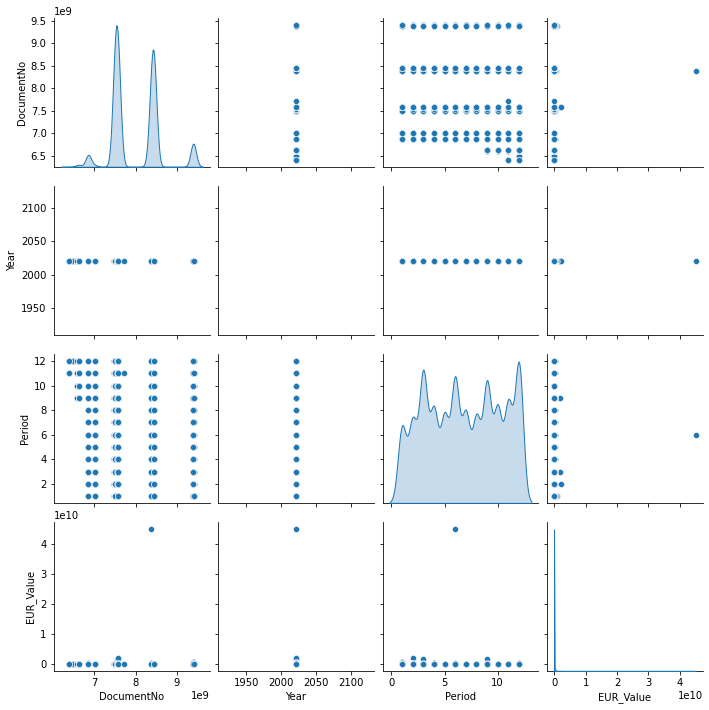

In [17]:
import seaborn as sns
sns.pairplot(MJE, diag_kind='kde')

<AxesSubplot:xlabel='EUR_Value'>

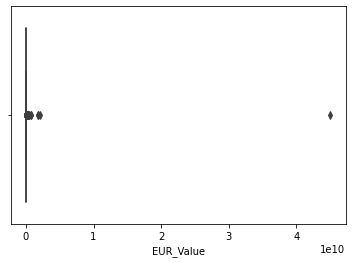

In [18]:
sns.boxplot(x='EUR_Value', y=None, data = MJE)

Text(0.5, 1.0, '')

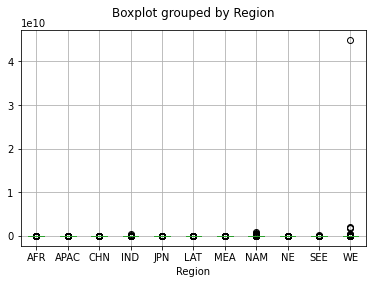

In [19]:
MJE.boxplot(column = 'EUR_Value', by = 'Region');
plt.title('')

   ### Remark: as per above 2 charts, we can notice that 'EUR_Value' contains at least one Outlier in the region WE.

### 4.2 Drop the row which contains the outlier: 'EUR_Value' = MAX

In [20]:
MJE.drop(MJE['EUR_Value'].idxmax())
MJE.head()
# MJE.loc[MJE['EUR_Value']!=MJE['EUR Value'].max()]

,CoCode,Region,DocumentNo,Year,Period,G/UMJE,Time,Reference Key,Type,DT descr,...,TCode,Pstng Date,Doc. Date,Entry Date,Crcy,Closing week based on entry date,Closing/non-closing week based on entry date,Quarter,Type2,EUR_Value
0,AE80,MEA,6630000017,2021,11,UMJE,12:34:43,6630000017AE802021,PN,GL Account Doc LSAS,...,FB01,2021-11-19,2021-11-19,2021-11-30,AED,P11 Tuesday,P11 Tuesday,Q4,Permanent,203728.69
1,AE80,MEA,7010000000,2021,3,UMJE,14:54:23,7010000000AE802021,QP,OPEX man rev Perm Ac,...,FB01,2021-03-25,2021-03-25,2021-03-25,AED,Non-closing week,P3 Non-closing week,Q1,Permanent,30279.92
2,AE80,MEA,7490000000,2021,3,GMJE,15:40:36,7490000000AE802021,S1,G/L Accr Permanent,...,FB01,2021-04-01,2021-04-01,2021-04-01,EUR,P3 Thursday,P3 Thursday,Q1,Permanent,200000.00
3,AE80,MEA,7490000001,2021,5,GMJE,08:41:14,7490000001AE802021,S1,G/L Accr Permanent,...,FB01,2021-06-03,2021-06-03,2021-06-03,EUR,P5 Thursday,P5 Thursday,Q2,Permanent,200000.00
4,AE80,MEA,7490000002,2021,6,GMJE,14:41:07,7490000002AE802021,S1,G/L Accr Permanent,...,FB01,2021-06-30,2021-06-30,2021-06-30,EUR,P6 Wednesday,P6 Wednesday,Q2,Permanent,200000.00


### 4.3 Re-plot the 'EUR Value' column after the Outlier has been removed

Text(0.5, 1.0, '')

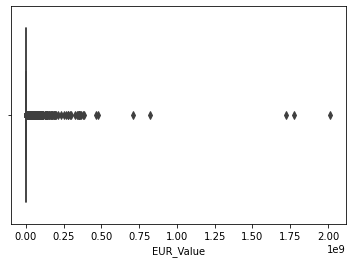

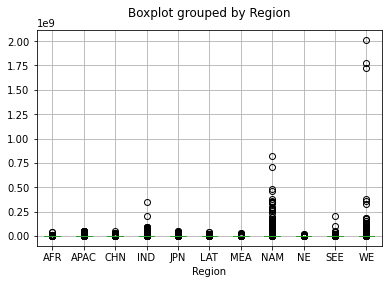

In [21]:
sns.boxplot(x='EUR_Value', y=None, data = MJE.drop(MJE['EUR_Value'].idxmax()))
MJE.drop(MJE['EUR_Value'].idxmax()).boxplot(column = 'EUR_Value', by = 'Region');
plt.title('')

### Remark: as per above two charts, we can notice that 'EUR_Value' still contains many Outliers

# 5. Outlier Detection and Treatment Using 1.5 IQR rule

In [22]:
MJE.sort_values('EUR_Value', ascending=False, inplace=True, ignore_index = True)
MJE.head()

,CoCode,Region,DocumentNo,Year,Period,G/UMJE,Time,Reference Key,Type,DT descr,...,TCode,Pstng Date,Doc. Date,Entry Date,Crcy,Closing week based on entry date,Closing/non-closing week based on entry date,Quarter,Type2,EUR_Value
0,FI85,WE,8380006832,2021,6,UMJE,15:44:16,8380006832FI852021,UI,I&R/NSN Interg. Corr,...,FB01,2021-06-30,2021-06-30,2021-07-01,EUR,P6 Thursday,P6 Thursday,Q2,Permanent,4.499970e+10
1,NL82,WE,7580000004,2021,2,UMJE,14:24:01,7580000004NL822021,SA,G/L account document,...,FB01,2021-03-03,2021-03-03,2021-03-03,EUR,P2 Wednesday,P2 Wednesday,Q1,Permanent,2.015390e+09
2,FI85,WE,7580002064,2021,9,UMJE,14:14:01,7580002064FI852021,SA,G/L account document,...,FB01,2021-09-17,2021-09-17,2021-09-17,EUR,Non-closing week,P9 Non-closing week,Q3,Permanent,1.778260e+09
3,FI85,WE,7580000442,2021,3,UMJE,09:10:52,7580000442FI852021,SA,G/L account document,...,FB01,2021-03-31,2021-03-31,2021-03-31,EUR,P3 Wednesday,P3 Wednesday,Q1,Permanent,1.720215e+09
4,US80,NAM,9390000001,2021,1,GMJE,19:00:24,9390000001US802021,XX,OI/OBL Permanent Adj,...,FB01,2021-02-04,2021-02-04,2021-02-04,USD,P1 Thursday,P1 Thursday,Q1,Permanent,8.214181e+08


### 5.1 Calculate Lowerbound and Upperbound values

In [23]:
def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

In [24]:
lowerbound,upperbound = outlier_treatment(MJE.EUR_Value)

In [25]:
print(lowerbound, upperbound)

-655496.3525 1179334.6675


In [26]:
MJE.EUR_Value[(MJE.EUR_Value < lowerbound) | (MJE.EUR_Value > upperbound)]

0       4.499970e+10
1       2.015390e+09
2       1.778260e+09
3       1.720215e+09
4       8.214181e+08
            ...     
8101    1.180916e+06
8102    1.180228e+06
8103    1.180119e+06
8104    1.179925e+06
8105    1.179362e+06
Name: EUR_Value, Length: 8106, dtype: float64

### Remark: as per above, it turns-out that we have 8106 outliers and those must to be dropped

### 5.2 Drop TOP 8106 values in EUR_Value column

In [27]:
MJE.drop(MJE[ (MJE.EUR_Value > upperbound) | (MJE.EUR_Value < lowerbound) ].index , inplace=True)
MJE.shape

(48034, 22)

### 5.3 Re-plot the 'EUR_Value' column after the outliers have been removed

Text(0.5, 1.0, '')

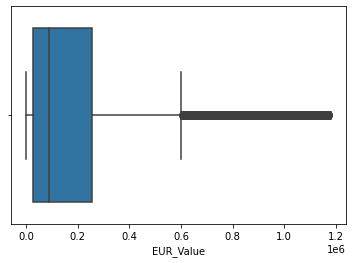

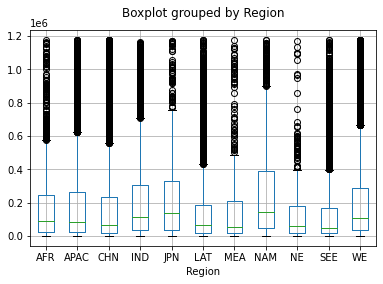

In [28]:
sns.boxplot(x='EUR_Value', y=None, data = MJE.drop(MJE['EUR_Value'].idxmax()))
MJE.drop(MJE['EUR_Value'].idxmax()).boxplot(column = 'EUR_Value', by = 'Region');
plt.title('')